# In this notebook I create fake backgrounds  to be used to compensate for incoherent scattering in TOF CT

In [5]:
import os
import shutil
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

from astropy.io import fits

(511, 511)
(511, 511)
<class 'numpy.float32'>


OSError: File 'out.fits' already exists.

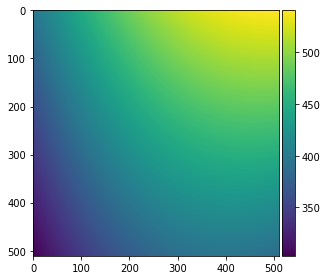

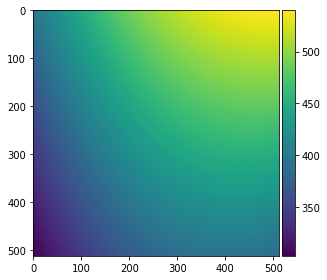

In [6]:
# Here I prepare the background meeasurements, Those were the BB measuresments taken from Pierre
background = io.imread('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/KipToolComputed/flat_background.tif')
plt.figure()
io.imshow(background)
print(np.shape(background))

new_back = np.zeros([512,512], dtype='int16')
new_back[0:511,0:511] = background
new_back[0:511,511] = background[:,510]
new_back[511,0:511] = background[510,:]
new_back[511,511] = background[510,510]

plt.figure()
io.imshow(new_back)
print(np.shape(background))
print(type(background[0,0]))

fits.writeto('out.fits', new_back.astype(int))

In [ ]:
path ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/'
filename = 'out.fits'
for i in range(0,250):
    newfilename = 'BackGround_'+str(i).zfill(4)+'.fits'
    shutil.copy(path+filename,path+newfilename)

477.1
10156.23026403063
95.42 95
477.1 477
667.94 667
763.36 763
858.78 858
954.2 954
1908.4 1908


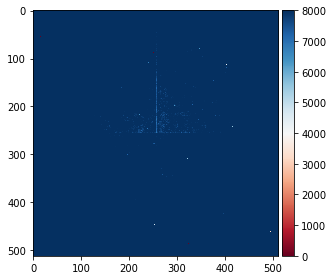

In [29]:
# Now i want to:
# [] read the OB image and calculate the average
# [] create the BG image as the 5%,10%,20%,1% of it 
# [] save all of them 

filename = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/IMAT_ob__SummedImg_01.fits'
fileob = fits.open(filename)
ob = fileob[0].data
plt.figure()
io.imshow(ob,vmin=0, vmax=8000)

median_ob_05 = np.median(ob).astype(int)*0.05
median_ob_10 = np.median(ob).astype(int)*0.10
median_ob_20 = np.median(ob).astype(int)*0.20
median_ob_01 = np.median(ob).astype(int)*0.01
median_ob_07 = np.median(ob).astype(int)*0.07
median_ob_08 = np.median(ob).astype(int)*0.08
median_ob_09 = np.median(ob).astype(int)*0.09

print(median_ob_05)
print(np.average(ob))
print(median_ob_01, (median_ob_01).astype(int))
print(median_ob_05, (median_ob_05).astype(int))
print(median_ob_07, (median_ob_07).astype(int))
print(median_ob_08, (median_ob_08).astype(int))
print(median_ob_09, (median_ob_09).astype(int))
print(median_ob_10, (median_ob_10).astype(int))
print(median_ob_20, (median_ob_20).astype(int))



In [20]:
myback_05 = np.zeros([512,512], dtype='int16')
myback_10 = np.zeros([512,512], dtype='int16')
myback_20 = np.zeros([512,512], dtype='int16')
myback_01 = np.zeros([512,512], dtype='int16')
myback_07 = np.zeros([512,512], dtype='int16')
myback_08 = np.zeros([512,512], dtype='int16')
myback_09 = np.zeros([512,512], dtype='int16')
myback_05[:,:] = median_ob_05.astype(int)
myback_10[:,:] = median_ob_10.astype(int)
myback_20[:,:] = median_ob_20.astype(int)
myback_01[:,:] = median_ob_01.astype(int)
myback_07[:,:] = median_ob_07.astype(int)
myback_08[:,:] = median_ob_08.astype(int)
myback_09[:,:] = median_ob_09.astype(int)

In [ ]:
plt.figure()
io.imshow(myback)
print(np.shape(myback), type(myback))

In [ ]:
# Here i compute a fixed percentage of the open beam as background to be corrected

path_05 = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_05pc'
path_20 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_20pc'
path_01 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_01pc'
path_10 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_10pc'


fits.writeto(path_10+'/myback.fits', myback_10)
fits.writeto(path_01+'/myback.fits', myback_01)
fits.writeto(path_20+'/myback.fits', myback_20)


filename_01 = path_01+'/myback.fits'
filename_10 = path_10+'/myback.fits'
filename_20 = path_20+'/myback.fits'

for i in range(0,250):
    newfilename_01 = path_01+'/BackGround_'+str(i).zfill(4)+'.fits'
    newfilename_10 = path_10+'/BackGround_'+str(i).zfill(4)+'.fits'
    newfilename_20 = path_20+'/BackGround_'+str(i).zfill(4)+'.fits'
    shutil.copy(filename_01,newfilename_01)
    shutil.copy(filename_10,newfilename_10)
    shutil.copy(filename_20,newfilename_20)

path_07_ob ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_07pc'

if not os.path.exists(path_07_ob):
    os.makedirs(path_07_ob)
    
fits.writeto(path_07+'/myback.fits', myback_07)

path_08_ob ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_08pc'
path_09_ob ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_09pc'


if not os.path.exists(path_08_ob):
    os.makedirs(path_08_ob)

if not os.path.exists(path_09_ob):
    os.makedirs(path_09_ob)
    
fits.writeto(path_08_ob+'/myback.fits', myback_08)
fits.writeto(path_09_ob+'/myback.fits', myback_09)

In [37]:
%%time
# here I create the white beam constant background from the sample projections

path_01 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_01pc_sample'
path_05 = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_05pc_sample'
path_07 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_07pc_sample'
path_08 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_08pc_sample'
path_09 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_09pc_sample'
path_10 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_10pc_sample'
path_20 ='D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_20pc_sample'
path_proj = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/'



if not os.path.exists(path_01):
    os.makedirs(path_01)

if not os.path.exists(path_05):
    os.makedirs(path_05)

if not os.path.exists(path_07):
    os.makedirs(path_07)

if not os.path.exists(path_08):
    os.makedirs(path_08)

if not os.path.exists(path_09):
    os.makedirs(path_09)

if not os.path.exists(path_10):
    os.makedirs(path_10)

if not os.path.exists(path_20):
    os.makedirs(path_20)

## dai

for i in range(0,250):
    myfile = fits.open(path_proj+'IMAT_tomo_SummedImg'+str(i).zfill(4)+'.fits')
    sample = myfile[0].data
    
    median_s_01 = np.median(sample).astype(int)*0.01
    median_s_05 = np.median(sample).astype(int)*0.05
    median_s_07 = np.median(sample).astype(int)*0.07
    median_s_08 = np.median(sample).astype(int)*0.08
    median_s_09 = np.median(sample).astype(int)*0.09
    median_s_10 = np.median(sample).astype(int)*0.10
    median_s_20 = np.median(sample).astype(int)*0.20
    
#     print(np.median(sample))
#     print(median_s_01, (median_s_01).astype(int))
#     print(median_s_05, (median_s_05).astype(int))
#     print(median_s_07, (median_s_07).astype(int))
#     print(median_s_08, (median_s_08).astype(int))
#     print(median_s_09, (median_s_09).astype(int))
#     print(median_s_10, (median_s_10).astype(int))
#     print(median_s_20, (median_s_20).astype(int))
    
    
    mysamscat_01 = np.zeros([512,512], dtype='int16')
    mysamscat_05 = np.zeros([512,512], dtype='int16')
    mysamscat_07 = np.zeros([512,512], dtype='int16')
    mysamscat_08 = np.zeros([512,512], dtype='int16')
    mysamscat_09 = np.zeros([512,512], dtype='int16')
    mysamscat_10 = np.zeros([512,512], dtype='int16')
    mysamscat_20 = np.zeros([512,512], dtype='int16')
    
    mysamscat_01[:,:] = median_s_01.astype(int)
    mysamscat_05[:,:] = median_s_05.astype(int)
    mysamscat_07[:,:] = median_s_07.astype(int)
    mysamscat_08[:,:] = median_s_08.astype(int)
    mysamscat_09[:,:] = median_s_09.astype(int)
    mysamscat_10[:,:] = median_s_10.astype(int)
    mysamscat_20[:,:] = median_s_20.astype(int)
    
        
    fits.writeto(path_01+'/Background'+str(i).zfill(4)+'.fits', mysamscat_01)
    fits.writeto(path_05+'/Background'+str(i).zfill(4)+'.fits', mysamscat_05)   
    fits.writeto(path_07+'/Background'+str(i).zfill(4)+'.fits', mysamscat_07)
    fits.writeto(path_08+'/Background'+str(i).zfill(4)+'.fits', mysamscat_08)
    fits.writeto(path_09+'/Background'+str(i).zfill(4)+'.fits', mysamscat_09)
    fits.writeto(path_10+'/Background'+str(i).zfill(4)+'.fits', mysamscat_10)
    fits.writeto(path_20+'/Background'+str(i).zfill(4)+'.fits', mysamscat_20)
    

Wall time: 18.7 s


In [17]:


path_proj = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/'


    

for i in range(0,250):
    myfile = fits.open(path_proj+'IMAT_tomo_SummedImg'+str(i).zfill(4)+'.fits')
    sample = myfile[0].data
    
    
    mysamscat_07 = np.zeros([512,512], dtype='int16')

    mysamscat_07[:,:] = median_s_07.astype(int)
    
    fits.writeto(path_07+'/Background'+str(i).zfill(4)+'.fits', mysamscat_07)

In [26]:




path_proj = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/'

print(path_08)



for i in range(0,250):
    myfile = fits.open(path_proj+'IMAT_tomo_SummedImg'+str(i).zfill(4)+'.fits')
    sample = myfile[0].data
    median_s_08 = np.median(sample).astype(int)*0.08
    median_s_09 = np.median(sample).astype(int)*0.09
    
    mysamscat_08 = np.zeros([512,512], dtype='int16')
    mysamscat_09 = np.zeros([512,512], dtype='int16')

    mysamscat_08[:,:] = median_s_08.astype(int)
    mysamscat_09[:,:] = median_s_08.astype(int)
    
    fits.writeto(path_08+'/Background'+str(i).zfill(4)+'.fits', mysamscat_08)
    fits.writeto(path_09+'/Background'+str(i).zfill(4)+'.fits', mysamscat_09)

D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue_08pc_sample


In [ ]:
myback_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Replicated/out.fits')
myback = myback_file[0].data

ob_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/IMAT_ob__SummedImg_01.fits')
myob = ob_file[0].data

nBins=165
# nBins =1

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/'

for i in range(1, nBins):
    # read the OB image in that Bin
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft2_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    OB_bin_filename = fits.open(filename)
    OB_bin = OB_bin_filename[0].data
    
    ratio = np.median(OB_bin)/np.median(myob)
    print(ratio)
    background_bin = (myback*ratio)
    outputfolder = outputpath + 'Bin_' +str(i).zfill(4)
    
    print(outputfolder)
    
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
    
    filename = '/Background_0000.fits'
    fits.writeto(outputfolder+filename, background_bin)
    
    for i in range(1,250):
        newfilename = '/BackGround_'+str(i).zfill(4)+'.fits'
        shutil.copy(outputfolder+filename,outputfolder+newfilename)

In [ ]:
# I redo it with the constant value as Background. 5% of the OB 

myback_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantValue/BackGround_0000.fits')
myback = myback_file[0].data

ob_file = fits.open('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/WhiteBeam/IMAT_ob__SummedImg_01.fits')
myob = ob_file[0].data

nBins=165
# nBins =1

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/ConstantBackground_binned/'

if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    
for i in range(0, nBins):
    # read the OB image in that Bin
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft2_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    OB_bin_filename = fits.open(filename)
    OB_bin = OB_bin_filename[0].data
    
    ratio = np.median(OB_bin)/np.median(myob)
    print(ratio)
    background_bin = (myback*ratio)
    outputfolder = outputpath + 'Bin_' +str(i).zfill(4)
    
    print(outputfolder)
    
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
    
    filename = '/Background_0000.fits'
    fits.writeto(outputfolder+filename, background_bin)
    
    for i in range(1,250):
        newfilename = '/BackGround_'+str(i).zfill(4)+'.fits'
        shutil.copy(outputfolder+filename,outputfolder+newfilename)

In [ ]:
# I redo it with computing a 5% of the sample image to correct for sample forward scattering

nBins=165
# nBins = 1
nProjs = 250

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned/'



if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    


for j in range(1,nProjs):
    
    inputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle'+str(j).zfill(4)+'_Corrected_Binned/'
    outputfolder = outputpath + 'angle_' +str(j).zfill(4)
    
    print(inputpath)
    print(outputfolder)
    
    for i in range(0, nBins):
        # read the sample images
        filename = inputpath+'/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
        sample_bin_filename = fits.open(filename)
        sample_bin = sample_bin_filename[0].data

        
        background_bin= sample_bin*0.05
        
#         print(outputfolder)

        if not os.path.exists(outputfolder):
            os.makedirs(outputfolder)

        filename = '/BackGround_'+str(i).zfill(4)+'.fits'
        fits.writeto(outputfolder+filename, background_bin)


In [ ]:
# I redo it with computing a 7% of the sample image to correct for sample forward scattering

nBins=165
# nBins = 1
nProjs = 250

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_7percent/'



if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    


for j in range(0,nProjs):
    
    inputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle'+str(j).zfill(4)+'_Corrected_Binned/'
    outputfolder = outputpath + 'angle_' +str(j).zfill(4)
    
    print(inputpath)
    print(outputfolder)
    
    for i in range(0, nBins):
        # read the sample images
        filename = inputpath+'/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
        sample_bin_filename = fits.open(filename)
        sample_bin = sample_bin_filename[0].data

        
        background_bin= sample_bin*0.07
        
#         print(outputfolder)

        if not os.path.exists(outputfolder):
            os.makedirs(outputfolder)

        filename = '/BackGround_'+str(i).zfill(4)+'.fits'
        fits.writeto(outputfolder+filename, background_bin)



In [ ]:
# I redo it with computing a 13% of the sample image to correct for sample forward scattering

nBins=165
# nBins = 1
nProjs = 250

background_bin = np.zeros([512,512], dtype='int16')
outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_13percent/'



if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    


for j in range(0,nProjs):
    
    inputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle'+str(j).zfill(4)+'_Corrected_Binned/'
    outputfolder = outputpath + 'angle_' +str(j).zfill(4)
    
    print(inputpath)
    print(outputfolder)
    
    for i in range(0, nBins):
        # read the sample images
        filename = inputpath+'/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
        sample_bin_filename = fits.open(filename)
        sample_bin = sample_bin_filename[0].data

        
        background_bin= sample_bin*0.13
        
#         print(outputfolder)

        if not os.path.exists(outputfolder):
            os.makedirs(outputfolder)

        filename = '/BackGround_'+str(i).zfill(4)+'.fits'
        fits.writeto(outputfolder+filename, background_bin)

In [ ]:
# I redo it with computing a 7% of the sample image to correct for sample forward scattering, but this time with a constant value 

nBins=165
# nBins = 1
nProjs = 250


outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_7percent_const/'



if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    


for j in range(0,nProjs):
    
    inputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle'+str(j).zfill(4)+'_Corrected_Binned/'
    outputfolder = outputpath + 'angle_' +str(j).zfill(4)
    
    print(inputpath)
    print(outputfolder)
    
    
    for i in range(0, nBins):
        background_bin = np.ones([512,512])
        # read the sample images
        filename = inputpath+'/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
        sample_bin_filename = fits.open(filename)
        sample_bin = sample_bin_filename[0].data

        
        background_bin *= np.median(sample_bin)*0.07
        print(np.median(sample_bin)*0.07)
        
#         print(outputfolder)

        if not os.path.exists(outputfolder):
            os.makedirs(outputfolder)

        filename = '/BackGround_'+str(i).zfill(4)+'.fits'
        fits.writeto(outputfolder+filename, background_bin)


In [12]:
# I redo it with computing a 5% of the sample image to correct for sample forward scattering, but this time with a constant value 

nBins=165
# nBins = 1
nProjs = 250


outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/'



if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    


for j in range(0,nProjs):
    
    inputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle'+str(j).zfill(4)+'_Corrected_Binned/'
    outputfolder = outputpath + 'angle_' +str(j).zfill(4)
    
    print(inputpath)
    print(outputfolder)
    
    
    for i in range(0, nBins):
        background_bin = np.ones([512,512])
        # read the sample images
        filename = inputpath+'/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
        sample_bin_filename = fits.open(filename)
        sample_bin = sample_bin_filename[0].data

        
        background_bin *= np.median(sample_bin)*0.05
#         print(np.median(sample_bin)*0.05)
        
#         print(outputfolder)

        if not os.path.exists(outputfolder):
            os.makedirs(outputfolder)

        filename = '/BackGround_'+str(i).zfill(4)+'.fits'
        fits.writeto(outputfolder+filename, background_bin)

D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0000_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0000
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0001_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0001
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0002_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0002
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0003_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binne

D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0032_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0032
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0033_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0033
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0034_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0034
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0035_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binne

D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0064_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0064
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0065_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0065
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0066_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0066
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0067_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binne

D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0096_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0096
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0097_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0097
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0098_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0098
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0099_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binne

D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0128_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0128
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0129_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0129
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0130_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_5percent_const/angle_0130
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle0131_Corrected_Binned/
D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binne

KeyboardInterrupt: 

In [ ]:
%% time
# I redo it with computing a 10% of the sample image to correct for sample forward scattering, but this time with a constant value 

nBins=165
# nBins = 1
nProjs = 250


outputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_Sample_binned_10percent_const/'



if not os.path.exists(outputpath):
    os.makedirs(outputpath)
    


for j in range(0,nProjs):
    
    inputpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle'+str(j).zfill(4)+'_Corrected_Binned/'
    outputfolder = outputpath + 'angle_' +str(j).zfill(4)
    
    print(inputpath)
    print(outputfolder)
    
    
    for i in range(0, nBins):
        background_bin = np.ones([512,512])
        # read the sample images
        filename = inputpath+'/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
        sample_bin_filename = fits.open(filename)
        sample_bin = sample_bin_filename[0].data

        
        background_bin *= np.median(sample_bin)*0.10
#         print(np.median(sample_bin)*0.10)
        
#         print(outputfolder)

        if not os.path.exists(outputfolder):
            os.makedirs(outputfolder)

        filename = '/BackGround_'+str(i).zfill(4)+'.fits'
        fits.writeto(outputfolder+filename, background_bin)